In [36]:
import numpy as np
import random

In [48]:
%%time
u = [0.25,0.4,0.1,0.3,0.2]
rho = 0.1
gamma = 2
N = 10**3
N1 = 10**5
n = len(u)

def S_len(y):
    s1 = np.minimum(y[:,0]+y[:,3],y[:,0]+y[:,2]+y[:,4])
    s2 = np.minimum(y[:,1]+y[:,4],y[:,1]+y[:,2]+y[:,3])
    return np.minimum(s1,s2)

v = np.array(u)
g = 0

#begin loop
while(g < gamma):
    #use v to generate random sample
    y = -np.log(np.random.rand(N,n))
    y = y * v

    #score each sample
    S = S_len(y)

    #sort samples by score
    SS = np.sort(S)
    SS_idx = np.argsort(S)

    #take the elite set
    eidx = round(N * (1-rho)) - 1
    g = S[eidx]
    if g >= gamma:
        g = gamma
        while(SS[eidx] >= g): eidx -= 1
        eidx += 1

    #update weights
    W = np.ones(N)
    for j in range(n):
        W = W * np.exp(-y[:,j] * (1/u[j] - 1/v[j])) * v[j]/u[j]

    #recalculate v
    for j in range(n):
        v[j] = np.sum(W[SS_idx[eidx:N]] * y[SS_idx[eidx:N],j]) / np.sum(W[SS_idx[eidx:N]])

    print(f"{g:6.4f}:\t{v}\n")

  

0.9588:	[0.50549715 0.72687927 0.0943581  0.46792008 0.34755367]

0.2659:	[0.79162956 0.90081778 0.12766833 0.61162123 0.4968684 ]

1.1172:	[1.14622395 1.26687337 0.11567122 0.67095922 0.58117563]

0.6863:	[1.49236094 1.72169164 0.14808121 0.80248911 0.69265596]

1.5881:	[1.7744306  2.08043785 0.12348347 1.00878176 0.78001533]

0.9766:	[2.44870521 2.75327023 0.15841391 1.01467565 0.52402075]

2.0000:	[1.74838965 1.9988296  0.10375064 0.56156421 0.3673369 ]

Wall time: 3.98 ms


In [46]:
%%time
y = np.array([1,1,1,1,1,0,0,0,0,0])
length = y.shape[0]
probs = [[0.5]*2] * length #[P(1),P(0)]
rng = np.random.default_rng()
N = 50
rho = 0.1
t = 1
same_gamma_number = 2
gammas = []

def Score(X):
    return length - np.sum(np.abs(X-y), axis=1)

for i in range(10):
    X=[]
    for i in range(N):
        x=[]
        for i in range(length):
            x.append(rng.choice([0,1],1,p=probs[i])[0])
        X.append(x)
    X = np.array(X)
    S = Score(X)
    SS = np.sort(S)
    SS_idx = np.argsort(S)

    eidx = round(N * (1-rho)) - 1
    g = S[eidx]
    gammas.append(g)
    for j in range(length):
        ones_prob = np.sum(X[SS_idx[eidx:],j])/SS_idx[eidx:].shape[0]
        probs[j] = [1-ones_prob, ones_prob]

    if(len(gammas) >= 2):
        if gammas[-1] == gammas[-2]:
            print("\n\nConverged to ideal distribution, breaking from loop...")
            print("*******************************")
            print(t, g, "\n",probs)
            break

    print(t, g, "\n",probs)
    print("*******************************\n")
    t+=1






1 5 
 [[0.16666666666666663, 0.8333333333333334], [0.5, 0.5], [0.16666666666666663, 0.8333333333333334], [0.16666666666666663, 0.8333333333333334], [0.33333333333333337, 0.6666666666666666], [1.0, 0.0], [0.8333333333333334, 0.16666666666666666], [0.8333333333333334, 0.16666666666666666], [0.6666666666666667, 0.3333333333333333], [0.8333333333333334, 0.16666666666666666]]
*******************************

2 9 
 [[0.16666666666666663, 0.8333333333333334], [0.33333333333333337, 0.6666666666666666], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [1.0, 0.0], [0.8333333333333334, 0.16666666666666666], [1.0, 0.0], [0.8333333333333334, 0.16666666666666666], [1.0, 0.0]]
*******************************

3 8 
 [[0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0]]
*******************************

4 10 
 [[0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0]]
*********************

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

Text(0.5, 1.0, '(<dAvgCat,dVarCat>)')

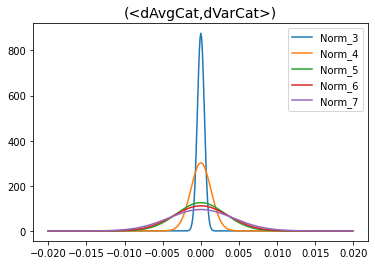

In [52]:
#x-axis ranges from -0.02 to 0.02 with step size of 0.0001
x=np.arange(-.02,0.02,0.0001)

#define multiple normal distributions

#didn't plot 1st - obviously zero variance
#plt.plot(x, norm.pdf(x,0,9.544766412362332E-5),label='Norm_2')
plt.plot(x, norm.pdf(x,0,4.553684404970682E-4),label='Norm_3')
plt.plot(x, norm.pdf(x,0,0.0013218724666549102),label='Norm_4')
plt.plot(x, norm.pdf(x,0,0.003184081085215251),label='Norm_5')
plt.plot(x, norm.pdf(x,0,0.0035852897682440345),label='Norm_6')
plt.plot(x, norm.pdf(x,0,0.004202544499052081),label='Norm_7')

#add legend to the plot
plt.legend()

plt.title('(<dAvgCat,dVarCat>)', fontsize=14)

Text(0.5, 1.0, '(<dAvgNorm,dVarNorm>)')

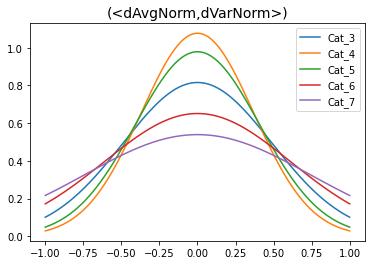

In [53]:
#x-axis ranges from -0.02 to 0.02 with step size of 0.0001
x=np.arange(-1,1,0.0001)

#define multiple normal distributions

#didn't plot 1st - obviously zero variance
#plt.plot(x, norm.pdf(x,0,0.13249250639409216),label='Cat_2')
plt.plot(x, norm.pdf(x,0,0.4889569017382593),label='Cat_3')
plt.plot(x, norm.pdf(x,0,0.37030483643912687),label='Cat_4')
plt.plot(x, norm.pdf(x,0,0.4074551142795088),label='Cat_5')
plt.plot(x, norm.pdf(x,0,0.6125510337602633),label='Cat_6')
plt.plot(x, norm.pdf(x,0,0.7397621098163364),label='Cat_7')

#add legend to the plot
plt.legend()

plt.title('(<dAvgNorm,dVarNorm>)', fontsize=14)